## Ques1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data = pd.read_csv("student-por.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
X = data[['studytime', 'absences', 'failures', 'G1', 'G2']]
y = data['G3']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 1.3334148339990057
R2 Score: 0.8632635694850659


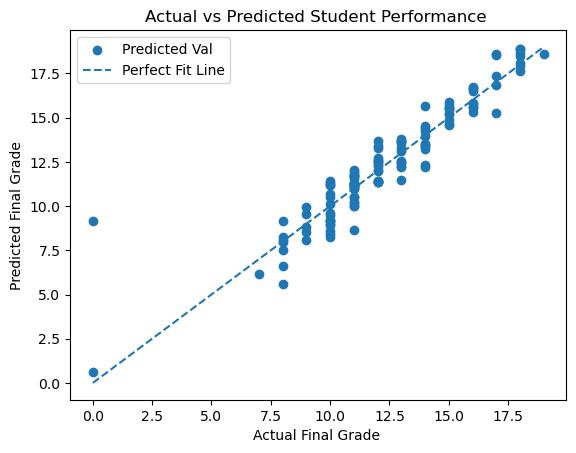

In [ ]:
plt.scatter(y_test, y_pred, label="Predicted Val")


min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val],
         [min_val, max_val],
         linestyle='--',
         label="Perfect Fit Line")

plt.xlabel("Actual Final Grade ")
plt.ylabel("Predicted Final Grade") 
plt.title("Actual vs Predicted Student Performance ")
plt.legend()

plt.show()

## Ques2

In [16]:
import math

age_x = [43, 21, 25, 42, 57, 59]
glucose_y = [99, 65, 79, 75, 87, 81]
n = len(age_x)

sum_x = sum(age_x)
sum_y = sum(glucose_y)
sum_x_sq = sum(x**2 for x in age_x)        
sum_y_sq = sum(y**2 for y in glucose_y)     
sum_xy = sum(x*y for x, y in zip(age_x, glucose_y)) 

numerator = (n * sum_xy) - (sum_x * sum_y)

term_x = (n * sum_x_sq) - (sum_x**2)
term_y = (n * sum_y_sq) - (sum_y**2)
denominator = math.sqrt(term_x * term_y)

r = numerator / denominator
print(f"Numerator: {numerator}")
print(f"Denominator: {denominator:.4f}")
print(f"Correlation Coefficient (r): {r:.4f}")

Numerator: 2868
Denominator: 5413.2726
Correlation Coefficient (r): 0.5298


##  Ques 3

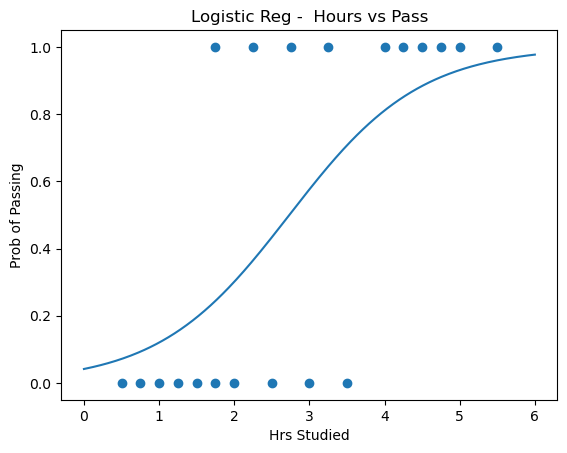

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

hours = np.array([
    0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
    2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50
])

pass_fail = np.array([
    0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 1, 1, 1, 1, 1
])

X = hours.reshape(-1, 1)
y = pass_fail

model = LogisticRegression()
model.fit(X, y)

x_curve = np.linspace(0, 6, 300).reshape(-1, 1)
y_curve = model.predict_proba(x_curve)[:, 1]

plt.figure()
plt.scatter(hours, pass_fail)
plt.plot(x_curve, y_curve)
plt.xlabel("Hrs Studied")
plt.ylabel("Prob of Passing")
plt.title("Logistic Reg -  Hours vs Pass")
plt.show()

## Ques4

In [24]:
import matplotlib.pyplot as plt
import numpy as np

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Oct', 'Nov', 'Dec']

actual_sales = np.array([112, 113, 114, 115, 112, 121, 122, 114])
predicted_sales = np.array([113, 112, 116, 117, 110, 118, 121, 115])

mse = np.mean((actual_sales - predicted_sales) ** 2)
rmse = np.sqrt(mse)
hybrid_error = 0.3 * mse + 0.25 * rmse

mape = np.mean(np.abs((actual_sales - predicted_sales) / actual_sales)) * 100

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Hybrid Error: {hybrid_error:.3f}")
print(f"MAPE: {mape:.2f}%")


MSE: 3.125
RMSE: 1.768
Hybrid Error: 1.379
MAPE: 1.40%


## Ques 5

In [21]:
X1 = np.array([3, 4, 5, 6, 2])
X2 = np.array([8, 5, 7, 3, 1])
Y  = np.array([-3.7, 3.5, 2.5, 11.5, 5.7])
X = np.column_stack((X1, X2))
model = LinearRegression()
model.fit(X, Y)

b0 = model.intercept_
b1, b2 = model.coef_

new_data = np.array([[3, 2]])
predicted_Y = model.predict(new_data)

print("Regression Equation:")
print(f"Y = {b0:.3f} + ({b1:.3f})X1 + ({b2:.3f})X2")
print(f"Predicted Y value: {predicted_Y[0]:.3f}")

Regression Equation:
Y = 2.800 + (2.282)X1 + (-1.672)X2
Predicted Y value: 6.300


## Ques 6

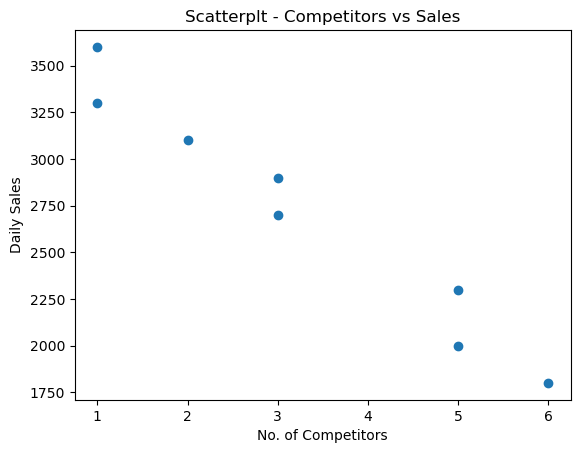

Linear Regression 
Sales = 3773.53 + (-326.47) × Competitors


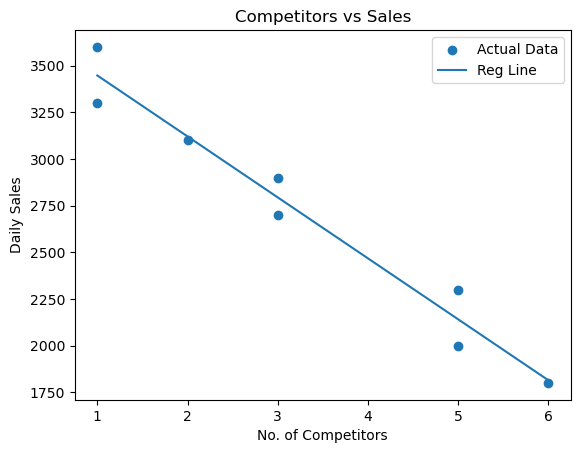

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

competitors = np.array([1, 1, 2, 3, 3, 5, 5, 6])
sales = np.array([3600, 3300, 3100, 2900, 2700, 2300, 2000, 1800])

X = competitors.reshape(-1, 1)
y = sales

plt.figure()
plt.scatter(competitors, sales)
plt.xlabel("No. of Competitors")
plt.ylabel("Daily Sales")
plt.title("Scatterplt - Competitors vs Sales")
plt.show()

model = LinearRegression()
model.fit(X, y)

b0 = model.intercept_
b1 = model.coef_[0]

print(f"Linear Regression ")
print(f"Sales = {b0:.2f} + ({b1:.2f}) × Competitors")
x_line = np.linspace(1, 6, 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.figure()
plt.scatter(competitors, sales, label="Actual Data")
plt.plot(x_line, y_line, label="Reg Line")
plt.xlabel("No. of Competitors")
plt.ylabel("Daily Sales")
plt.title("Competitors vs Sales")
plt.legend()
plt.show()